In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For visualization
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN


In [4]:
train_data = pd.read_csv("/content/mnist_train.csv")
test_data = pd.read_csv("/content/mnist_test.csv")

train_data.head()


0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   783  label  
0  0.0    5.0  
1  0.0    0.0  
2  0.0    4.0  
3  0.0    1.0  
4  0.0    9.0  

[5 rows x 785 columns]

In [5]:
# Separate Features and Target
X_train, y_train = train_data.drop(columns=['label']), train_data['label']
X_test, y_test = test_data.drop(columns=['label']), test_data['label']

# Normalize Data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert Data to Float
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Print Data Types
print(X_train.dtypes, X_test.dtypes)


0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
779    float64
780    float64
781    float64
782    float64
783    float64
Length: 784, dtype: object 0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
779    float64
780    float64
781    float64
782    float64
783    float64
Length: 784, dtype: object


In [6]:
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("X_train_split shape:", X_train_split.shape)
print("X_val shape:", X_val.shape)
print("y_train_split shape:", y_train_split.shape)
print("y_val shape:", y_val.shape)

X_train_split shape: (2295, 784)
X_val shape: (574, 784)
y_train_split shape: (2295,)
y_val shape: (574,)


In [8]:
import warnings
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.exceptions import ConvergenceWarning

# Suppress Convergence Warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Split Data (80% training, 20% testing)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed, X_test_imputed = imputer.fit_transform(X_train_split), imputer.transform(X_test_split)

# Impute Missing Values in Target Variable
y_train_imputed = SimpleImputer(strategy='most_frequent').fit_transform(y_train_split.values.reshape(-1, 1)).ravel()

# Initialize and Train Models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NaiveBayes': GaussianNB()
}

for name, model in models.items():
    try:
        model.fit(X_train_imputed, y_train_imputed)
        print(f"{name} trained successfully.")
    except Exception as e:
        print(f"Error training {name}: {e}")



RandomForest trained successfully.
MLP trained successfully.
KNN trained successfully.
NaiveBayes trained successfully.


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Handle Missing Values in X_val
imputer = SimpleImputer(strategy='mean')  # Replace NaN with column mean
X_val = imputer.fit_transform(X_val)

# Initialize Models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB()
}

# Define Parameter Grids for Hyperparameter Tuning
param_grids = {
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    'MLP': {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.001]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

# Perform Grid Search
best_models = {}
for name, model in models.items():
    if name in param_grids:  # Only tune models with hyperparameters
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_val, y_val)
        best_models[name] = grid_search.best_estimator_
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")



Best hyperparameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best hyperparameters for MLP: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best hyperparameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}


In [12]:
best_models = {}
best_scores = {}

for model_name, model in models.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
        try:
            grid_search.fit(X_val, y_val)
            best_models[model_name] = grid_search.best_estimator_
            best_scores[model_name] = grid_search.best_score_
            print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
            print(f"Best score for {model_name}: {grid_search.best_score_}")
        except Exception as e:
            print(f"Error tuning {model_name}: {e}")
    else:
        print(f"No parameter grid defined for {model_name}")

Best hyperparameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score for RandomForest: 0.8466586678301337
Best hyperparameters for MLP: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best score for MLP: 0.841477603257708
Best hyperparameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best score for KNN: 0.8327697789412448
No parameter grid defined for NaiveBayes


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Handle missing values in features (X)
imputer = SimpleImputer(strategy='mean')
X_train_imputed, X_test_imputed = imputer.fit_transform(X_train_split), imputer.transform(X_test_split)

# Handle missing values in target variable (y)
y_imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = y_imputer.fit_transform(y_train_split.values.reshape(-1, 1)).ravel()
y_test_imputed = y_imputer.transform(y_test_split.values.reshape(-1, 1)).ravel()

# Evaluate models
for name, model in best_models.items():
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test_imputed, y_pred)

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:\n{classification_report(y_test_imputed, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test_imputed, y_pred)}\n")


RandomForest Accuracy: 0.9983
RandomForest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        72
         2.0       1.00      1.00      1.00        51
         3.0       0.99      1.00      0.99        77
         4.0       1.00      0.98      0.99        58
         5.0       1.00      1.00      1.00        53
         6.0       1.00      1.00      1.00        57
         7.0       1.00      1.00      1.00        60
         8.0       1.00      1.00      1.00        47
         9.0       1.00      1.00      1.00        52

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574

RandomForest Confusion Matrix:
[[47  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0]
 [ 0  0  0 77  0  0  0  0  0  0]
 [ 0  0  0  

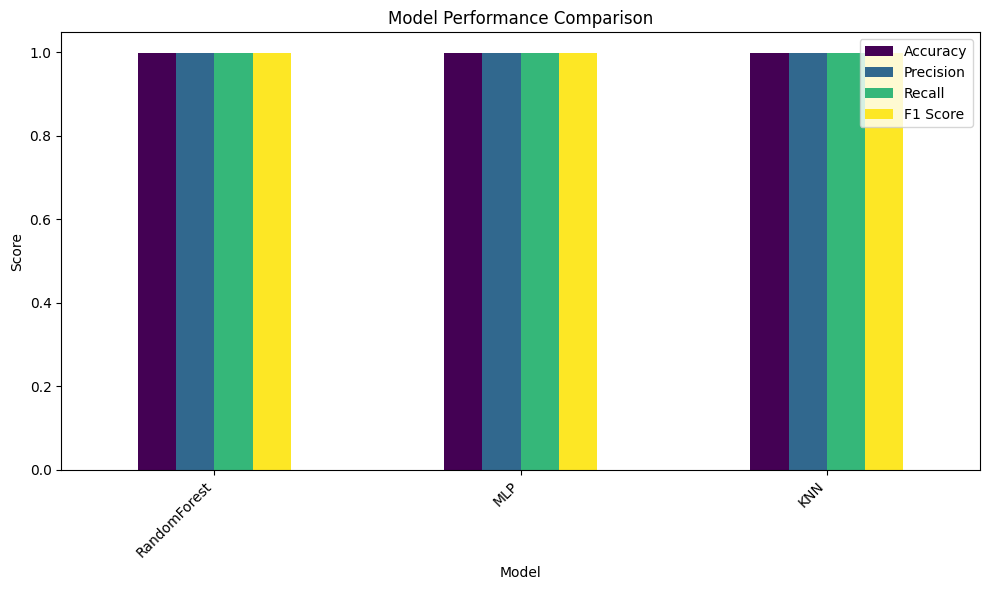

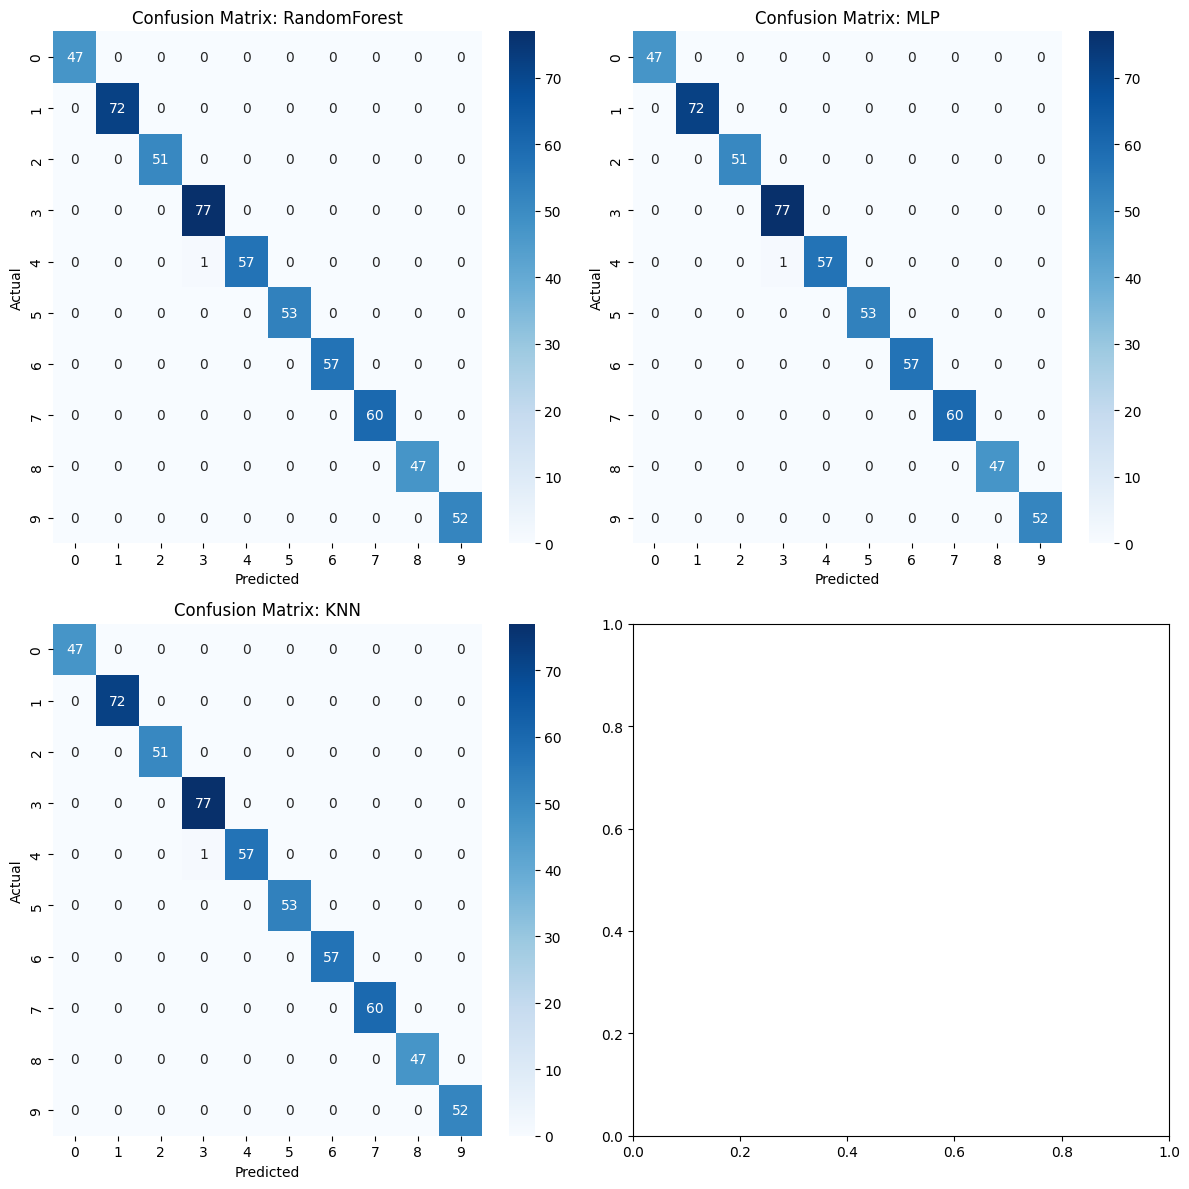

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Store evaluation results
results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test_imputed)
    report = classification_report(y_test_imputed, y_pred, output_dict=True)

    results.append([
        name,
        accuracy_score(y_test_imputed, y_pred),
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score'],
        confusion_matrix(y_test_imputed, y_pred)
    ])

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Confusion Matrix'])
results_df.set_index('Model', inplace=True)

# Plot performance metrics
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('performance_metrics.png')
plt.show()

# Ploting CM
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

for i, (name, row) in enumerate(results_df.iterrows()):
    sns.heatmap(row['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()


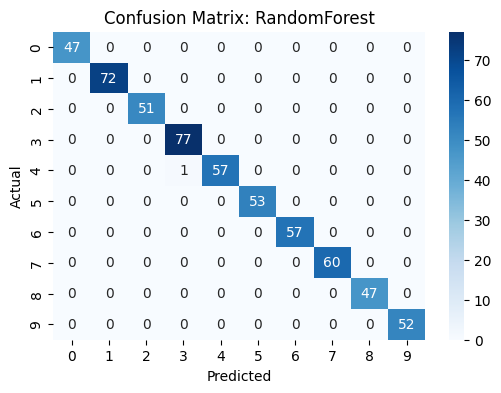

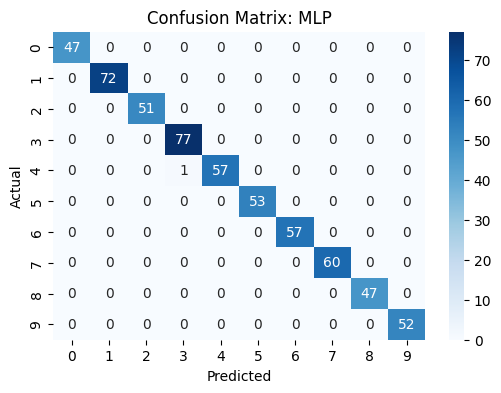

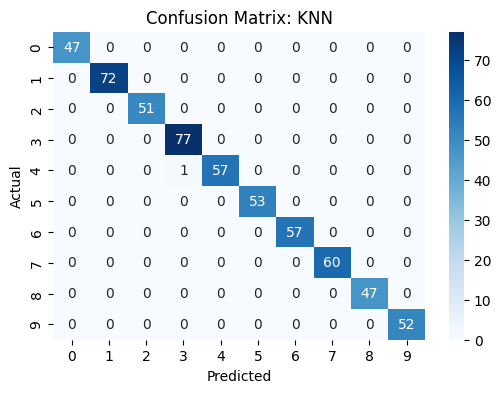

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#plotting CM
for name, model in best_models.items():
    cm = confusion_matrix(y_test_imputed, model.predict(X_test_imputed))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
